#### Correlación por Parámetro 80ft y 1100ft por día VS Concentración del Glifosato (C= 0, 0.4, 1.5, 3 y juntos)
 

### Se importan las librerias

In [1]:
# Se importan las librerias
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### Se cargan los datos

In [2]:
data = pd.read_csv("data/data_all.csv", sep=";")

data

,date,date(m/d/y),time,day,concentration,chloride_80ft(mg/L),chloride_1100ft(mg/L),difference_chloride,CL2_80ft(PPM),CL2_1100ft(PPM),...,difference_ORP_YSI,pH_YSI_80ft,pH_YSI_1100ft,difference_pH,sp_cond_YSI_80ft(µS/cm),sp_cond_YSI_1100ft(µS/cm),difference_sp_cond_YSI,turbidity_YSI_80ft(NTU+),turbidity_YSI_1100ft(NTU+),difference_turbidity
0,25/01/05 12:30,25/01/05,12.30,1,0.0,16.33,17.02,0.69,1.02,1.05,...,75,7.23,8.68,1.45,281,284,3,0.5,0.1,-0.4
1,25/01/05 12:31,25/01/05,12.31,1,0.0,16.39,17.12,0.73,1.02,1.05,...,75,7.22,8.67,1.45,281,283,2,0.8,0.1,-0.7
2,25/01/05 12:32,25/01/05,12.32,1,0.0,16.39,17.12,0.73,1.02,1.05,...,75,7.22,8.68,1.46,281,283,2,0.8,0.1,-0.7
3,25/01/05 12:33,25/01/05,12.33,1,0.0,16.38,17.11,0.73,1.02,1.04,...,76,7.22,8.68,1.46,281,283,2,0.8,0.1,-0.7
4,25/01/05 12:34,25/01/05,12.34,1,0.0,16.39,17.03,0.64,1.02,1.04,...,76,7.22,8.68,1.46,281,284,3,0.7,0.1,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,26/01/05 15:56,26/01/05,15.56,2,3.0,16.37,17.93,1.56,1.00,1.02,...,95,7.17,8.72,1.55,287,289,2,0.8,0.0,-0.8
622,26/01/05 15:57,26/01/05,15.57,2,3.0,16.38,17.92,1.54,1.00,1.01,...,96,7.17,8.72,1.55,287,289,2,0.9,0.0,-0.9
623,26/01/05 15:58,26/01/05,15.58,2,3.0,16.37,17.90,1.53,1.00,1.01,...,96,7.17,8.71,1.54,287,289,2,0.8,0.0,-0.8
624,26/01/05 15:59,26/01/05,15.59,2,3.0,16.35,17.91,1.56,1.00,1.01,...,97,7.16,8.71,1.55,287,289,2,0.9,0.0,-0.9


### Preprocesamiento

In [3]:
# Se buscan registros NaN para eliminarlos
print('Columna      Cantidad NaN')
print(data.isnull().sum(axis = 0))
print(data.shape)

Columna      Cantidad NaN
date                           0
date(m/d/y)                    0
time                           0
day                            0
concentration                  0
chloride_80ft(mg/L)            0
chloride_1100ft(mg/L)          0
difference_chloride            0
CL2_80ft(PPM)                  0
CL2_1100ft(PPM)                0
difference_CL2                 0
DO_YSI_80ft(mg/L)              0
DO_YSI_1100ft(mg/L)            0
difference_DO_YSI              0
FreeClorine_ATI_80ft(PPM)      0
FreeClorine_ATI_1100ft(PPM)    0
difference_FreeClorine_ATI     0
FreeClorine_X_80ft(PPM)        0
FreeClorine_X_1100ft(PPM)      0
difference_FreeClorine_X       0
ORP_YSI_80ft(mV)               0
ORP_YSI_1100ft(mV)             0
difference_ORP_YSI             0
pH_YSI_80ft                    0
pH_YSI_1100ft                  0
difference_pH                  0
sp_cond_YSI_80ft(µS/cm)        0
sp_cond_YSI_1100ft(µS/cm)      0
difference_sp_cond_YSI         0
turbidity_YSI_80f

In [4]:
# Se eliminan los registros NaN del DataFrame
#data = data.dropna()

In [5]:
# Se genera las estadísticas del DataFrame
data.describe()

,time,day,concentration,chloride_80ft(mg/L),chloride_1100ft(mg/L),difference_chloride,CL2_80ft(PPM),CL2_1100ft(PPM),difference_CL2,DO_YSI_80ft(mg/L),...,difference_ORP_YSI,pH_YSI_80ft,pH_YSI_1100ft,difference_pH,sp_cond_YSI_80ft(µS/cm),sp_cond_YSI_1100ft(µS/cm),difference_sp_cond_YSI,turbidity_YSI_80ft(NTU+),turbidity_YSI_1100ft(NTU+),difference_turbidity
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,...,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,13.869968,1.504792,1.161981,16.382061,17.323882,0.941821,0.932812,0.953690,0.020911,14.553035,...,103.948882,7.156677,8.652077,1.495399,283.683706,286.035144,2.351438,0.745367,0.068371,-0.676997
std,1.857436,0.500377,1.164567,0.285729,0.511636,0.600773,0.155687,0.158904,0.234459,0.145409,...,32.323375,0.050923,0.091153,0.110395,2.617900,2.224671,0.625695,0.167960,0.101617,0.192369
min,10.050000,1.000000,0.000000,15.620000,16.550000,-0.360000,0.470000,0.490000,-0.510000,14.130000,...,56.000000,6.980000,8.240000,1.060000,281.000000,283.000000,1.000000,0.000000,-0.100000,-2.500000
25%,12.562500,1.000000,0.000000,16.290000,16.880000,0.460000,0.982500,1.000000,0.000000,14.530000,...,79.000000,7.140000,8.650000,1.470000,281.000000,284.000000,2.000000,0.700000,0.000000,-0.800000
50%,14.120000,2.000000,0.400000,16.390000,17.105000,0.870000,1.000000,1.020000,0.020000,14.610000,...,100.000000,7.150000,8.670000,1.490000,285.000000,287.000000,2.000000,0.800000,0.000000,-0.700000
75%,15.287500,2.000000,1.500000,16.470000,17.880000,1.590000,1.010000,1.040000,0.030000,14.640000,...,114.000000,7.190000,8.700000,1.560000,286.000000,288.000000,3.000000,0.800000,0.100000,-0.600000
max,17.300000,2.000000,3.000000,17.120000,18.350000,1.930000,1.030000,1.050000,0.560000,14.740000,...,251.000000,7.230000,8.730000,1.750000,287.000000,289.000000,3.000000,2.600000,0.500000,0.100000


### -------------------------------------------------------------------------------

## Correlaciones

### -------------------------------------------------------------------------------

### Para Tiempo VS cada parámetro (Diferentes concentraciones)

In [6]:
# Se selecciona la concentración
data1 = data[data['concentration'] == 3.0]

### -------------------------------------------------------------------------------

### Chloride

Text(0, 0.5, 'Chloride(mg/L)')

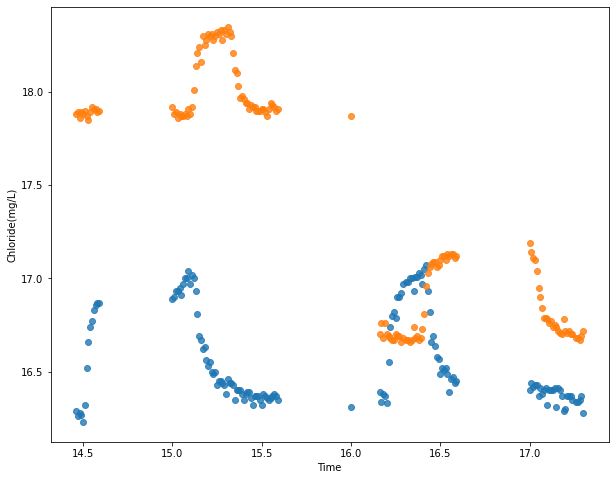

In [7]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data1['time'], y= data1['chloride_80ft(mg/L)'], alpha= 0.8)
# Naranja
ax.scatter(x= data1['time'], y= data1['chloride_1100ft(mg/L)'], alpha= 0.8)
ax.set_xlabel('Time')
ax.set_ylabel('Chloride(mg/L)')

In [8]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** Time VS Chloride 80ft (mg/L) ***")
print('Correlación Pearson: ', data1['time'].corr(data1['chloride_80ft(mg/L)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['chloride_80ft(mg/L)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['chloride_80ft(mg/L)'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft  
print("*** Time VS Chloride 1100 ft (mg/L) *** ")
print('Correlación Pearson: ', data1['time'].corr(data1['chloride_1100ft(mg/L)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['chloride_1100ft(mg/L)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['chloride_1100ft(mg/L)'], method='kendall'))
print("-------------------------------------------")


*** Time VS Chloride 80ft (mg/L) ***
Correlación Pearson:  -0.18890319020697494
Correlación Spearman:  -0.2247484790298042
Correlación Kendall:  -0.20183677617407855
-------------------------------------------
*** Time VS Chloride 1100 ft (mg/L) *** 
Correlación Pearson:  -0.8488410488176542
Correlación Spearman:  -0.6831672722279637
Correlación Kendall:  -0.44921620928032213
-------------------------------------------


### -------------------------------------------------------------------------------

### CL2

Text(0, 0.5, 'CL2 (PPM)')

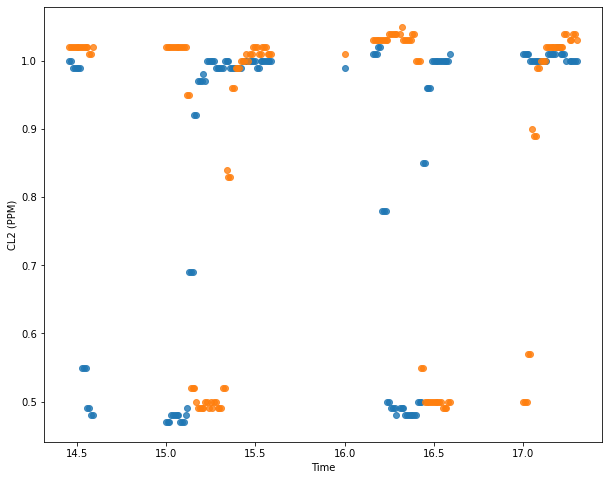

In [9]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data1['time'], y= data1['CL2_80ft(PPM)'], alpha= 0.8)
# Naranja
ax.scatter(x= data1['time'], y= data1['CL2_1100ft(PPM)'], alpha= 0.8)
ax.set_xlabel('Time')
ax.set_ylabel('CL2 (PPM)')

In [10]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** Time VS CL2 80ft (PPM) ***")
print('Correlación Pearson: ', data1['time'].corr(data1['CL2_80ft(PPM)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['CL2_80ft(PPM)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['CL2_80ft(PPM)'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft 
print("*** Time VS CL2 1100ft (PPM) *** ")
print('Correlación Pearson: ', data1['time'].corr(data1['CL2_1100ft(PPM)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['CL2_1100ft(PPM)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['CL2_1100ft(PPM)'], method='kendall'))
print("-------------------------------------------")


*** Time VS CL2 80ft (PPM) ***
Correlación Pearson:  0.2574532279208703
Correlación Spearman:  0.5179593509404723
Correlación Kendall:  0.3916832986955545
-------------------------------------------
*** Time VS CL2 1100ft (PPM) *** 
Correlación Pearson:  -0.018906252868903458
Correlación Spearman:  0.08301476004356241
Correlación Kendall:  0.08816756947853589
-------------------------------------------


### -------------------------------------------------------------------------------

### DO YSI

Text(0, 0.5, 'CL2 (PPM)')

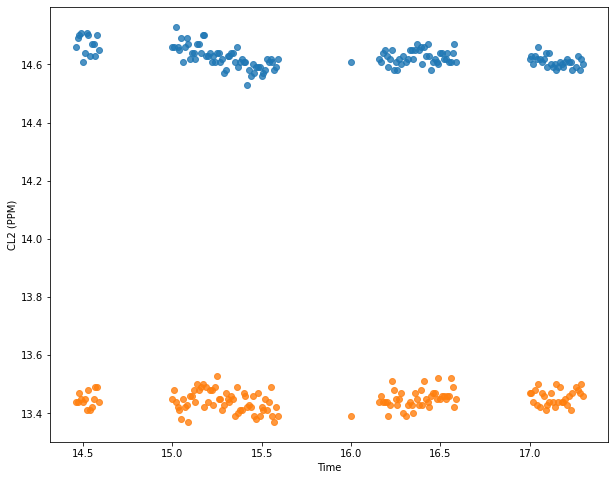

In [11]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data1['time'], y= data1['DO_YSI_80ft(mg/L)'], alpha= 0.8)
# Naranja
ax.scatter(x= data1['time'], y= data1['DO_YSI_1100ft(mg/L)'], alpha= 0.8)
ax.set_xlabel('Time')
ax.set_ylabel('CL2 (PPM)')

In [12]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** Time VS DO_YSI 80ft (mg/L)  ***")
print('Correlación Pearson: ', data1['time'].corr(data1['DO_YSI_80ft(mg/L)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['DO_YSI_80ft(mg/L)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['DO_YSI_80ft(mg/L)'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft 
print("*** Time VS DO_YSI 1100ft (mg/L) *** ")
print('Correlación Pearson: ', data1['time'].corr(data1['DO_YSI_1100ft(mg/L)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['DO_YSI_1100ft(mg/L)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['DO_YSI_1100ft(mg/L)'], method='kendall'))
print("-------------------------------------------")

*** Time VS DO_YSI 80ft (mg/L)  ***
Correlación Pearson:  -0.37921919385005304
Correlación Spearman:  -0.4167036259472031
Correlación Kendall:  -0.2938386650857342
-------------------------------------------
*** Time VS DO_YSI 1100ft (mg/L) *** 
Correlación Pearson:  0.14067887490187647
Correlación Spearman:  0.11890413641452477
Correlación Kendall:  0.0871936537178695
-------------------------------------------


### -------------------------------------------------------------------------------

### FreeClorine ATI

Text(0, 0.5, 'FreeClorine_ATI (PPM)')

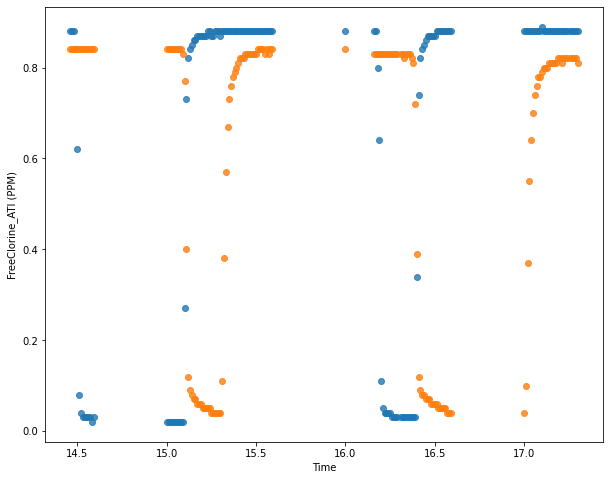

In [13]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data1['time'], y= data1['FreeClorine_ATI_80ft(PPM)'], alpha= 0.8)
# Naranja
ax.scatter(x= data1['time'], y= data1['FreeClorine_ATI_1100ft(PPM)'], alpha= 0.8)
ax.set_xlabel('Time')
ax.set_ylabel('FreeClorine_ATI (PPM)')

In [14]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** Time VS FreeClorine_ATI 80ft (PPM) ***")
print('Correlación Pearson: ', data1['time'].corr(data1['FreeClorine_ATI_80ft(PPM)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['FreeClorine_ATI_80ft(PPM)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['FreeClorine_ATI_80ft(PPM)'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft 
print("*** Time VS FreeClorine_ATI 1100ft (PPM)  *** ")
print('Correlación Pearson: ', data1['time'].corr(data1['FreeClorine_ATI_1100ft(PPM)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['FreeClorine_ATI_1100ft(PPM)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['FreeClorine_ATI_1100ft(PPM)'], method='kendall'))
print("-------------------------------------------")

*** Time VS FreeClorine_ATI 80ft (PPM) ***
Correlación Pearson:  0.2702646422438517
Correlación Spearman:  0.44624389737203635
Correlación Kendall:  0.35267502973194087
-------------------------------------------
*** Time VS FreeClorine_ATI 1100ft (PPM)  *** 
Correlación Pearson:  -0.019125945013176635
Correlación Spearman:  -0.3289763772806432
Correlación Kendall:  -0.2186525851854724
-------------------------------------------


### -------------------------------------------------------------------------------

### FreeClorine X

Text(0, 0.5, 'FreeClorine_X (PPM)')

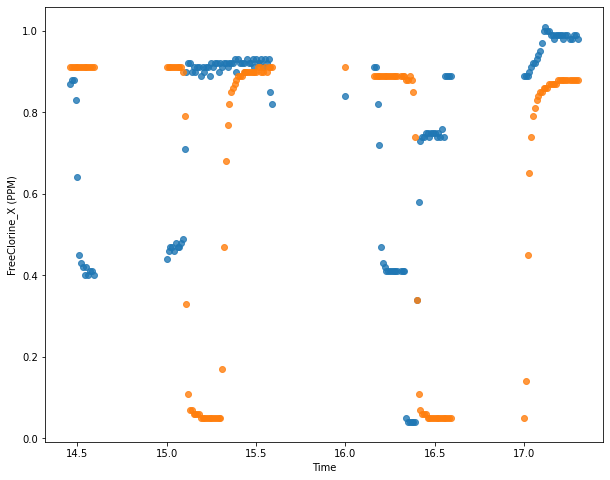

In [15]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data1['time'], y= data1['FreeClorine_X_80ft(PPM)'], alpha= 0.8)
# Naranja
ax.scatter(x= data1['time'], y= data1['FreeClorine_X_1100ft(PPM)'], alpha= 0.8)
ax.set_xlabel('Time')
ax.set_ylabel('FreeClorine_X (PPM)')

In [16]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** Time VS FreeClorine X 80ft (PPM)  ***")
print('Correlación Pearson: ', data1['time'].corr(data1['FreeClorine_X_80ft(PPM)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['FreeClorine_X_80ft(PPM)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['FreeClorine_X_80ft(PPM)'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft 
print("*** Time VS FreeClorine X 1100ft (PPM) *** ")
print('Correlación Pearson: ', data1['time'].corr(data1['FreeClorine_X_1100ft(PPM)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['FreeClorine_X_1100ft(PPM)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['FreeClorine_X_1100ft(PPM)'], method='kendall'))
print("-------------------------------------------")

*** Time VS FreeClorine X 80ft (PPM)  ***
Correlación Pearson:  0.19855476024226618
Correlación Spearman:  0.36800486703825214
Correlación Kendall:  0.2806932915519241
-------------------------------------------
*** Time VS FreeClorine X 1100ft (PPM) *** 
Correlación Pearson:  -0.02262304174027251
Correlación Spearman:  -0.37024409803258596
Correlación Kendall:  -0.25591906928023983
-------------------------------------------


### -------------------------------------------------------------------------------

### ORP YSI

Text(0, 0.5, 'ORP_YSI (mV)')

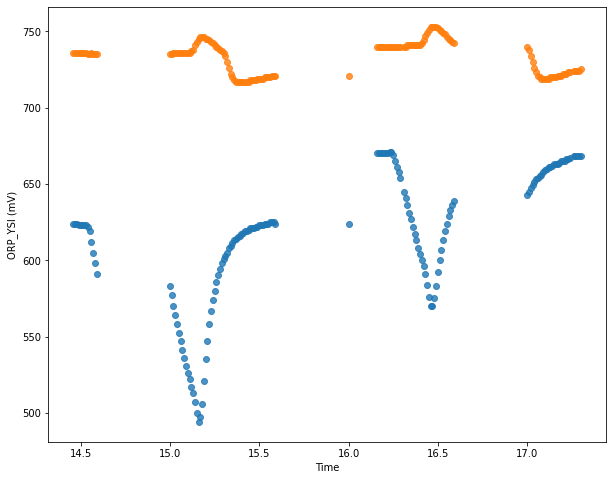

In [17]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data1['time'], y= data1['ORP_YSI_80ft(mV)'], alpha= 0.8)
# Naranja
ax.scatter(x= data1['time'], y= data1['ORP_YSI_1100ft(mV)'], alpha= 0.8)
ax.set_xlabel('Time')
ax.set_ylabel('ORP_YSI (mV)')

In [18]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** Time VS ORP_YSI 80ft (mV) VS  ***")
print('Correlación Pearson: ', data1['time'].corr(data1['ORP_YSI_80ft(mV)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['ORP_YSI_80ft(mV)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['ORP_YSI_80ft(mV)'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft 
print("*** Time VS ORP_YSI 1100ft (mV)  *** ")
print('Correlación Pearson: ', data1['time'].corr(data1['ORP_YSI_1100ft(mV)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['ORP_YSI_1100ft(mV)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['ORP_YSI_1100ft(mV)'], method='kendall'))
print("-------------------------------------------")

*** Time VS ORP_YSI 80ft (mV) VS  ***
Correlación Pearson:  0.6016227407113907
Correlación Spearman:  0.6286175375470687
Correlación Kendall:  0.4862674608365746
-------------------------------------------
*** Time VS ORP_YSI 1100ft (mV)  *** 
Correlación Pearson:  -0.11286538205170595
Correlación Spearman:  -0.039128531526816224
Correlación Kendall:  0.033395950874831534
-------------------------------------------


### -------------------------------------------------------------------------------

### pH YSI

Text(0, 0.5, 'pH_YSI')

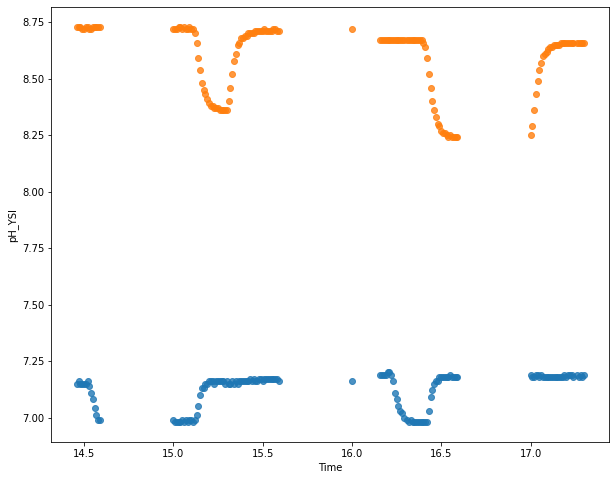

In [19]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data1['time'], y= data1['pH_YSI_80ft'], alpha= 0.8)
# Naranja
ax.scatter(x= data1['time'], y= data1['pH_YSI_1100ft'], alpha= 0.8)
ax.set_xlabel('Time')
ax.set_ylabel('pH_YSI')

In [20]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** Time VS pH_YSI 80ft (mV) ***")
print('Correlación Pearson: ', data1['time'].corr(data1['pH_YSI_80ft'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['pH_YSI_80ft'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['pH_YSI_80ft'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft 
print("*** Time VS pH_YSI 1100ft (mV) *** ")
print('Correlación Pearson: ', data1['time'].corr(data1['pH_YSI_1100ft'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['pH_YSI_1100ft'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['pH_YSI_1100ft'], method='kendall'))
print("-------------------------------------------")

*** Time VS pH_YSI 80ft (mV) ***
Correlación Pearson:  0.3197688892847615
Correlación Spearman:  0.6087177667701167
Correlación Kendall:  0.46577543822564843
-------------------------------------------
*** Time VS pH_YSI 1100ft (mV) *** 
Correlación Pearson:  -0.24756784248817218
Correlación Spearman:  -0.5183042351223086
Correlación Kendall:  -0.3791187786953688
-------------------------------------------


### -------------------------------------------------------------------------------

### sp_cond

Text(0, 0.5, 'sp_cond_YSI')

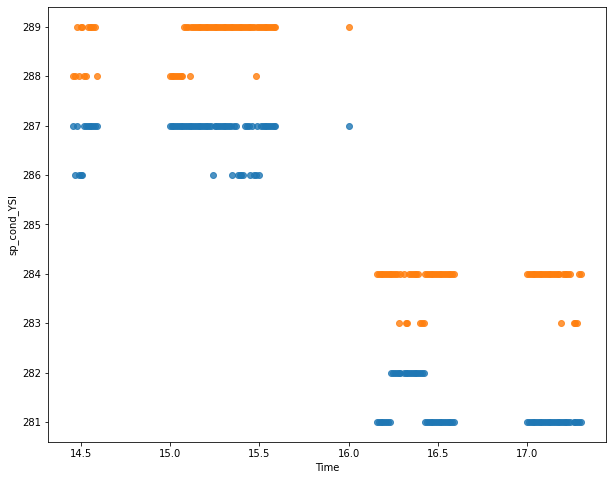

In [21]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data1['time'], y= data1['sp_cond_YSI_80ft(µS/cm)'], alpha= 0.8)
# Naranja
ax.scatter(x= data1['time'], y= data1['sp_cond_YSI_1100ft(µS/cm)'], alpha= 0.8)
ax.set_xlabel('Time')
ax.set_ylabel('sp_cond_YSI')

In [22]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** Time VS sp_cond_YSI 80ft (µS/cm) ***")
print('Correlación Pearson: ', data1['time'].corr(data1['sp_cond_YSI_80ft(µS/cm)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['sp_cond_YSI_80ft(µS/cm)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['sp_cond_YSI_80ft(µS/cm)'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft 
print("*** Time VS sp_cond_YSI 1100ft (µS/cm) *** ")
print('Correlación Pearson: ', data1['time'].corr(data1['sp_cond_YSI_1100ft(µS/cm)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['sp_cond_YSI_1100ft(µS/cm)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['sp_cond_YSI_1100ft(µS/cm)'], method='kendall'))
print("-------------------------------------------")

*** Time VS sp_cond_YSI 80ft (µS/cm) ***
Correlación Pearson:  -0.9068460560553078
Correlación Spearman:  -0.8580899118634199
Correlación Kendall:  -0.7016867939037196
-------------------------------------------
*** Time VS sp_cond_YSI 1100ft (µS/cm) *** 
Correlación Pearson:  -0.8742399694799841
Correlación Spearman:  -0.76288096086589
Correlación Kendall:  -0.5542070024056206
-------------------------------------------


### -------------------------------------------------------------------------------

### Turbidity YSI

Text(0, 0.5, 'turbidity_YSI')

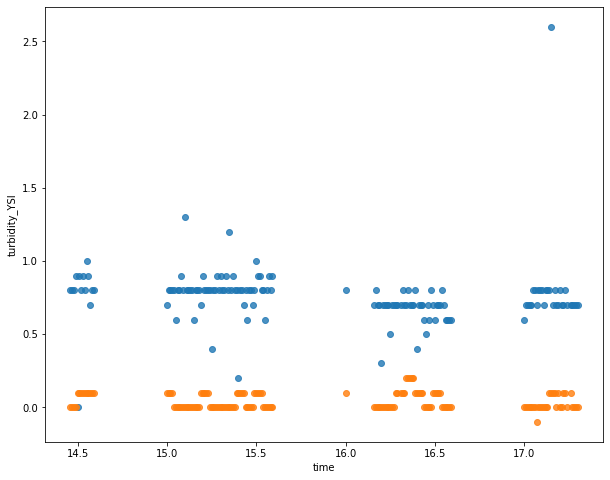

In [23]:
# Gráfico de Dispersión
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data1['time'], y= data1['turbidity_YSI_80ft(NTU+)'], alpha= 0.8)
# Naranja
ax.scatter(x= data1['time'], y= data1['turbidity_YSI_1100ft(NTU+)'], alpha= 0.8)
ax.set_xlabel('time')
ax.set_ylabel('turbidity_YSI')

In [24]:
# Cálculo de correlaciones 

# Parametro 80ft
print("*** Time VS turbidity_YSI 80ft (NTU+)  ***")
print('Correlación Pearson: ', data1['time'].corr(data1['turbidity_YSI_80ft(NTU+)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['turbidity_YSI_80ft(NTU+)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['turbidity_YSI_80ft(NTU+)'], method='kendall'))
print("-------------------------------------------")

# Parametro 1100ft 
print("*** Time VS turbidity_YSI 1100ft (NTU+)  *** ")
print('Correlación Pearson: ', data1['time'].corr(data1['turbidity_YSI_1100ft(NTU+)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['turbidity_YSI_1100ft(NTU+)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['turbidity_YSI_1100ft(NTU+)'], method='kendall'))
print("-------------------------------------------")

*** Time VS turbidity_YSI 80ft (NTU+)  ***
Correlación Pearson:  -0.08379538510378744
Correlación Spearman:  -0.42190415864956327
Correlación Kendall:  -0.31065988177615317
-------------------------------------------
*** Time VS turbidity_YSI 1100ft (NTU+)  *** 
Correlación Pearson:  -0.0624196188262156
Correlación Spearman:  -0.06362806231739739
Correlación Kendall:  -0.052653330538376106
-------------------------------------------
